# Xarray Code Munch

***Take Away Message**: for loops are likely not needed for most operations with xarray (and slow)*

In [1]:
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)

# Load example data from xarray tutorial
- 2 year-long dataset air temperature
- 6 hourly temporal resolution

In [2]:
ds = xr.tutorial.load_dataset("air_temperature", engine="netcdf4")

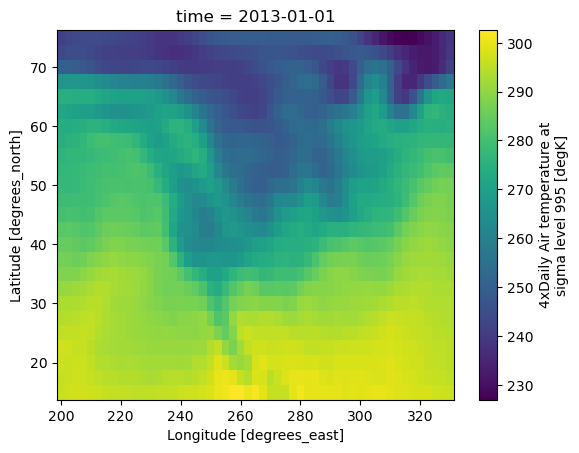

In [3]:
(ds["air"]
 .sel(time="2013-01-01T00:00:00")
 #.isel(time=0) # sahres a lot of pandas' syntax
 .plot()
)

# Rolling

In [4]:
ds["air"]

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [5]:
(ds["air"]
     .rolling(time=5, center=True)
     #.mean()
     #.construct("window_dim")
     #.mean("window_dim")
     #.isel(time=3)
     #.plot() 
)

DataArrayRolling [time->5(center)]

In [6]:
(ds["air"]
    .isel(time=0)
    #.rolling(lat=5, lon=5, center=True)
    #.mean()
    #.plot()
)

<xarray.DataArray 'air' (lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 298.0 297.8 297.6 296.9 296.8 296.6
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# Datetime conversion

- if the dates are stored following CF conventions (with arguments like `seconds since 1970-01-01`) xarray transforms the time DataArray into a datetime object
- also possible to deactivate the date conversion if stored in a different format

In [7]:
xr.tutorial.load_dataset("air_temperature", decode_times=True, engine="netcdf4")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Resampling
- The resampled dimension must be a datetime-like coordinate
- QS, QS-DEC, M, W, D, H, M

## Downsampling

In [8]:
(ds.resample(time="QS") # QS, QS-DEC, M, W, D
    .mean()
)

<xarray.Dataset>
Dimensions:  (lat: 25, time: 8, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 2013-04-01 ... 2014-10-01
Data variables:
    air      (time, lat, lon) float32 244.6 244.5 244.2 ... 298.7 298.7 298.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Upsampling

In [9]:
(ds.resample(time="M") # QS, QS-DEC, M, W, D
    .mean()
    #.resample(time="W")
    #.interpolate('linear')
)

<xarray.Dataset>
Dimensions:  (lat: 25, time: 24, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
Data variables:
    air      (time, lat, lon) float32 244.5 244.7 244.7 ... 297.7 297.7 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Group, apply, combine

## Seasonality weighted
- to properly do by season we have to weight each month with the corresponding number of days
- then group the samples by season

In [10]:
month_length = ds.time.dt.days_in_month

In [11]:
# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

In [12]:
# Calculate the weighted average
ds_season = (ds * weights).groupby("time.season").sum(dim="time")

# reorder the season
ds_season = ds_season.reindex({'season': ['DJF','MAM','JJA', 'SON']})

In [13]:
(ds_season["air"]
    #.sel(season="DJF")
    #.plot()
)

<xarray.DataArray 'air' (season: 4, lat: 25, lon: 53)>
247.0 247.0 246.7 246.3 245.6 244.9 ... 299.6 299.6 299.7 299.4 299.4 299.5
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## GroupBy any coordinate variables

In [14]:
(ds["air"]
     .groupby("time.month") # time.day time.week time.month
     #.std()
     #.sel(lon=250.0, lat=50.0)
     #.plot()
)

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [15]:
(ds["air"]
     .groupby("lat")
     #.mean(["lon"])
     #.isel(time=1065)
     #.plot()
)

DataArrayGroupBy, grouped over 'lat'
25 groups with labels 15.0, 17.5, 20.0, ..., 72.5, 75.0.

## Apply any functions to a groupby object

In [16]:
# directly a numpy function

(ds["air"]
     .groupby("time.month")
     .apply(np.mean)
)

<xarray.DataArray 'air' (month: 12)>
273.4 273.1 275.1 278.5 283.3 287.6 289.9 290.1 287.4 283.7 278.0 274.4
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [17]:
def mean_dim(a):
    return a.mean(dim=["time"]) 

In [18]:
(ds["air"]
     .groupby("time.month")
     .apply(mean_dim)
     #.isel(month=0)
     #.plot()
)

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
246.3 246.4 246.2 245.8 245.2 244.6 ... 298.1 298.0 298.0 297.6 297.6 297.5
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [19]:
def anomaly(a):
    return a - a.mean(dim=["time"]) 

In [20]:
(ds["air"]
     .groupby("time.month")
     .apply(anomaly)
     #.sel(lon=200.0, lat=75.0)
     #.plot()
)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
-5.15 -3.886 -2.715 -1.812 -1.125 ... -0.6161 -0.8265 -1.11 -1.375 -1.848
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]